<a href="https://colab.research.google.com/github/duraichellam001-tech/ev-range-model/blob/main/notebooks/01_physics_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vehicle Longitudinal Dynamics — Equations

### Rolling Resistance Force
F_rr = m · g · C_rr

### Aerodynamic Drag Force
F_aero = 0.5 · rho · A · C_d · v^2

### Acceleration Force
F_acc = m · a

### Total Force
F_total = F_rr + F_aero + F_acc

### Wheel Power
P_wheel = F_total · v

### Battery Power (assuming drivetrain efficiency η)
P_batt = P_wheel / η

### Energy Consumption (Wh/km)
Energy = Σ(P_batt * dt) / 3600
Wh/km = Energy (Wh) / Distance (km)

### State of Charge
SOC = 1 - (Energy_used / Battery_Capacity)



In [1]:
!pip install numpy pandas matplotlib scipy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ev-range-model/data/UDDS.csv")
df.columns = ["time","speed"]
df.head()

,time,speed
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


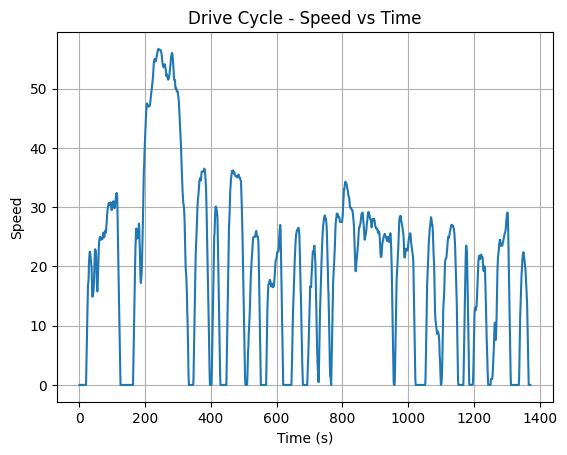

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['time'], df['speed'])
plt.xlabel('Time (s)')
plt.ylabel('Speed')
plt.title('Drive Cycle - Speed vs Time')
plt.grid()
plt.show()


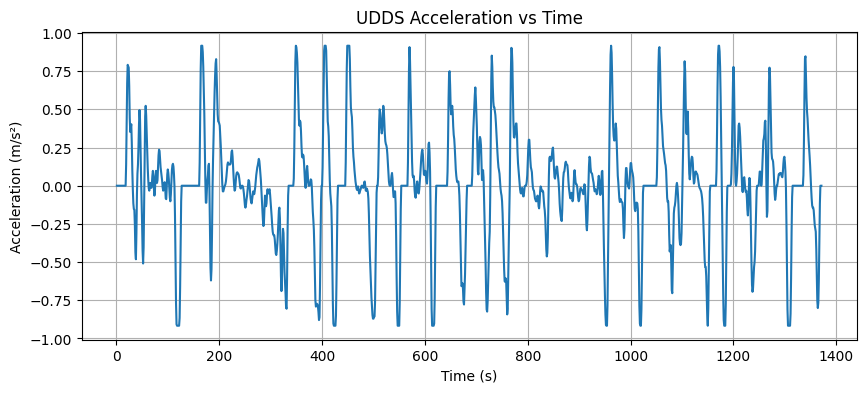

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df['time'], df['a_mps2'])
plt.title("UDDS Acceleration vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.show()


In [8]:
df["speed"] = df["speed"]*1.6 # Miles to kmph conversion

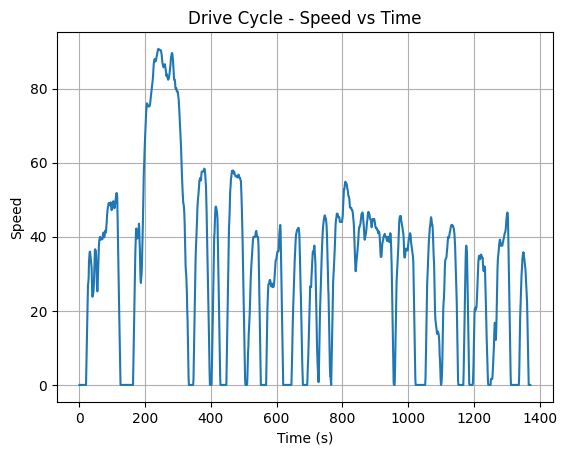

In [9]:
plt.plot(df['time'], df['speed'])
plt.xlabel('Time (s)')
plt.ylabel('Speed')
plt.title('Drive Cycle - Speed vs Time')
plt.grid()
plt.show()

In [14]:
# ACELERATION CALCULATION
df["speed"] = df["speed"]/3.6 # km/h to m/s conversion
dt = 1
df['a'] = df["speed"].diff()/dt
df['a'].fillna(0, inplace=True)

/tmp/ipython-input-1155402550.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['a'].fillna(0, inplace=True)


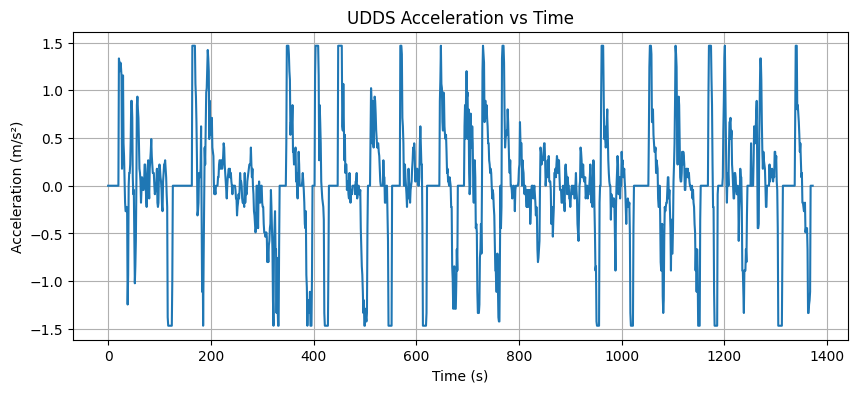

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df['time'], df['a'])
plt.title("UDDS Acceleration vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.show()

In [16]:
# DEFINING CONSTANTS

m = 1600      # kg
g = 9.81      # m/s^2
C_rr = 0.012
rho = 1.225   # kg/m3
A = 2.2       # m^2
Cd = 0.28


In [18]:
df['F_rr'] = m * g * C_rr
df['F_aero'] = 0.5 * rho * A * Cd * (df['speed']**2)
df['F_acc'] = m * df['a']

df['F_total'] = df['F_rr'] + df['F_aero'] + df['F_acc']


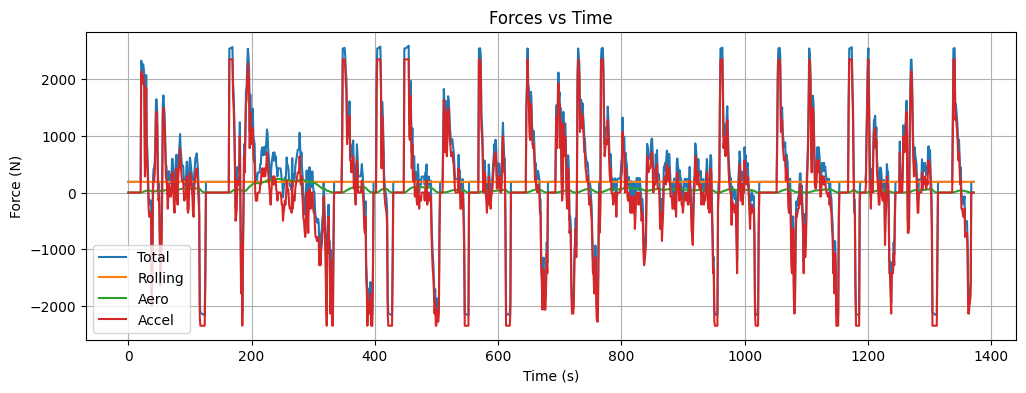

In [23]:
plt.figure(figsize=(12,4))
plt.plot(df['F_total'], label='Total')
plt.plot(df['F_rr'], label='Rolling')
plt.plot(df['F_aero'], label='Aero')
plt.plot(df['F_acc'], label='Accel')
plt.legend()
plt.title("Forces vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid()
plt.show()


In [25]:
df['P_wheel'] = df['F_total'] * df['speed']   # Watts


In [29]:
eta = 0.90
df['P_batt'] = df['P_wheel'] / eta # Power required from battery
df['P_batt'] = df['P_batt'].clip(lower=0) # Removing negative power --> REGEN will be handled later


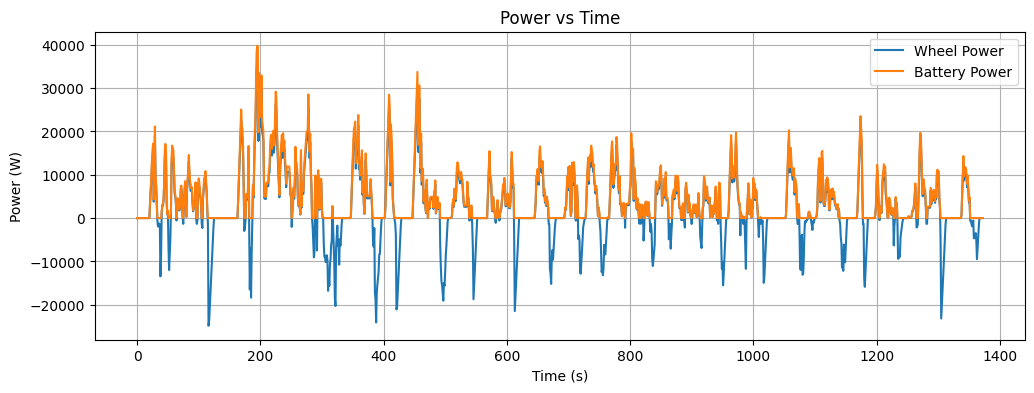

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df['P_wheel'], label='Wheel Power')
plt.plot(df['P_batt'], label='Battery Power')
plt.legend()
plt.title("Power vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.grid()
plt.show()
